<a href="https://colab.research.google.com/github/kashir123/GBPUSD-final-project/blob/main/GBPUSD_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# libraries

import yfinance as yf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Download GBP/USD historical data
data = yf.download("GBPUSD=X", start="2004-10-01", end="2024-10-01")

data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-10-01,1.812908,1.813598,1.793400,1.799111,1.799111,0
2004-10-04,1.797591,1.797785,1.782086,1.784312,1.784312,0
2004-10-05,1.784312,1.787694,1.780912,1.782912,1.782912,0
2004-10-06,1.782785,1.788493,1.775095,1.779486,1.779486,0
2004-10-07,1.779486,1.784312,1.777493,1.782499,1.782499,0


In [4]:
data = data.drop(columns=['Volume'])

In [5]:
data.head()

,Open,High,Low,Close,Adj Close
Date,,,,,
2004-10-01,1.812908,1.813598,1.793400,1.799111,1.799111
2004-10-04,1.797591,1.797785,1.782086,1.784312,1.784312
2004-10-05,1.784312,1.787694,1.780912,1.782912,1.782912
2004-10-06,1.782785,1.788493,1.775095,1.779486,1.779486
2004-10-07,1.779486,1.784312,1.777493,1.782499,1.782499


In [6]:
data.describe()

,Open,High,Low,Close,Adj Close
count,5200.000000,5200.000000,5200.000000,5200.000000,5200.000000
mean,1.518296,1.523915,1.512300,1.518320,1.518320
std,0.237287,0.237954,0.237076,0.237310,0.237310
min,1.072846,1.083541,0.637389,1.072754,1.072754
25%,1.303586,1.307950,1.299195,1.303607,1.303607
50%,1.517888,1.523926,1.511259,1.517957,1.517957
75%,1.643554,1.648404,1.636909,1.643372,1.643372
max,2.108415,2.115820,2.098812,2.108192,2.108192


In [6]:
data.isnull().sum()

,0
Open,0
High,0
Low,0
Close,0
Adj Close,0


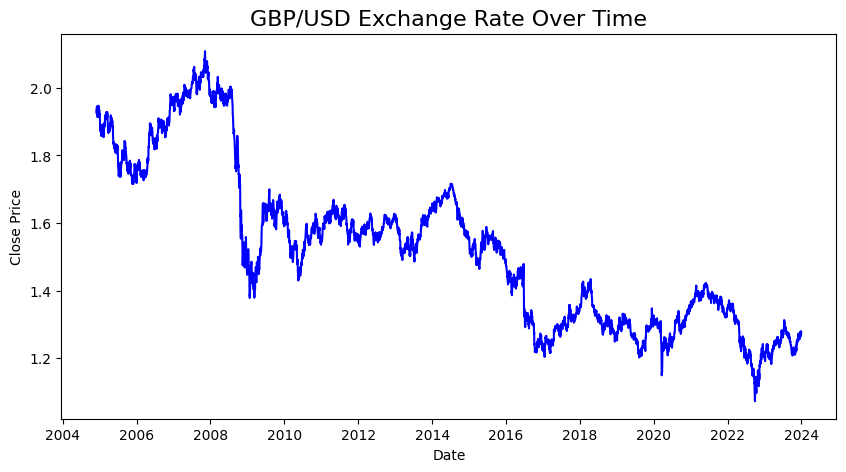

In [9]:
# visualize the data

plt.figure(figsize=(10,5))
sns.lineplot(x="Date", y="Close",data=data, color="blue")

plt.title('GBP/USD Exchange Rate Over Time', fontsize=16)
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.show()